<a href="https://colab.research.google.com/github/Lee-geonwu/class_ai4dl/blob/main/week5/chapter05_fundamentals-of-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 2s 0us/step


In [2]:
train_images.shape

(60000, 784)

In [3]:
np.random.random((len(train_images), 784)).shape

(60000, 784)

In [4]:
np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1).shape

(60000, 1568)

In [5]:
train_images_with_noise_channels[0]

array([0.        , 0.        , 0.        , ..., 0.29255975, 0.04066072,
       0.72937639])

In [8]:
train_images_with_zeros_channels[0]

array([0., 0., 0., ..., 0., 0., 0.])

**Training the same model on MNIST data with noise channels or all-zero channels**

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 7s 4ms/step - loss: 0.6309 - accuracy: 0.8080 - val_loss: 0.3136 - val_accuracy: 0.9080
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2589 - accuracy: 0.9200 - val_loss: 0.2381 - val_accuracy: 0.9249
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1697 - accuracy: 0.9476 - val_loss: 0.1599 - val_accuracy: 0.9531
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1197 - accuracy: 0.9625 - val_loss: 0.1415 - val_accuracy: 0.9576
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0887 - accuracy: 0.9725 - val_loss: 0.1423 - val_accuracy: 0.9578
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0670 - accuracy: 0.9781 - val_loss: 0.1319 - val_accuracy: 0.9633
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0504 - accuracy: 0.9838 - val_loss: 0.1384 - val_accuracy: 0.9610
Epoch 

**Plotting a validation accuracy comparison**

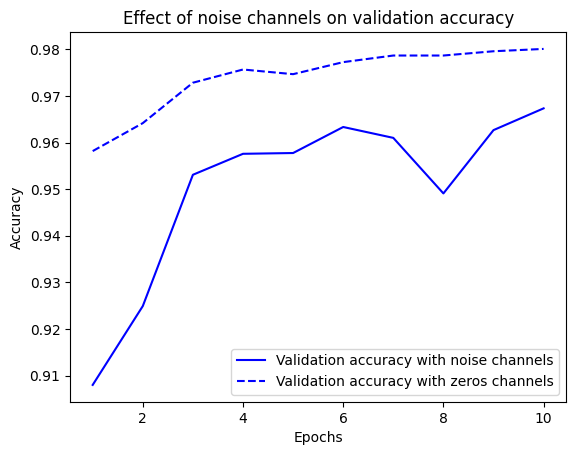

In [10]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [11]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 3ms/step - loss: 2.3148 - accuracy: 0.1040 - val_loss: 2.3037 - val_accuracy: 0.1071
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2988 - accuracy: 0.1186 - val_loss: 2.3112 - val_accuracy: 0.0992
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2910 - accuracy: 0.1276 - val_loss: 2.3206 - val_accuracy: 0.1103
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2789 - accuracy: 0.1387 - val_loss: 2.3270 - val_accuracy: 0.1009
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2628 - accuracy: 0.1534 - val_loss: 2.3338 - val_accuracy: 0.1042
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2444 - accuracy: 0.1647 - val_loss: 2.3478 - val_accuracy: 0.1054
Epoch 7/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2219 - accuracy: 0.1790 - val_loss: 2.3594 - val_accuracy: 0.1047

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [12]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.), # 0.01
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 605.3904 - accuracy: 0.3009 - val_loss: 2.2373 - val_accuracy: 0.1835
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 3.6344 - accuracy: 0.1594 - val_loss: 2.3848 - val_accuracy: 0.1023
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 2.4786 - accuracy: 0.1228 - val_loss: 2.2778 - val_accuracy: 0.1557
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 2.5413 - accuracy: 0.1608 - val_loss: 2.2098 - val_accuracy: 0.1788
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5010 - accuracy: 0.1350 - val_loss: 2.4531 - val_accuracy: 0.1381
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 2.4351 - accuracy: 0.1305 - val_loss: 2.3802 - val_accuracy: 0.1274
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5549 - accuracy: 0.1322 - val_loss: 2.4023 - val_accuracy: 0.1439
Epoc

**The same model with a more appropriate learning rate**

In [13]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3505 - accuracy: 0.9123 - val_loss: 0.1499 - val_accuracy: 0.9560
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1259 - accuracy: 0.9645 - val_loss: 0.1233 - val_accuracy: 0.9661
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0937 - accuracy: 0.9742 - val_loss: 0.1433 - val_accuracy: 0.9693
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0819 - accuracy: 0.9790 - val_loss: 0.1896 - val_accuracy: 0.9638
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0657 - accuracy: 0.9837 - val_loss: 0.1566 - val_accuracy: 0.9697
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0567 - accuracy: 0.9854 - val_loss: 0.1847 - val_accuracy: 0.9717
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0525 - accuracy: 0.9874 - val_loss: 0.1812 - val_accuracy: 0.9728
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [14]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.6581 - accuracy: 0.8387 - val_loss: 0.3570 - val_accuracy: 0.9049
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3514 - accuracy: 0.9026 - val_loss: 0.3108 - val_accuracy: 0.9124
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3175 - accuracy: 0.9119 - val_loss: 0.2934 - val_accuracy: 0.9188
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3018 - accuracy: 0.9161 - val_loss: 0.2860 - val_accuracy: 0.9205
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2923 - accuracy: 0.9184 - val_loss: 0.2800 - val_accuracy: 0.9218
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2856 - accuracy: 0.9206 - val_loss: 0.2768 - val_accuracy: 0.9215
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2809 - accuracy: 0.9220 - val_loss: 0.2732 - val_accuracy: 0.9251
Epoch 

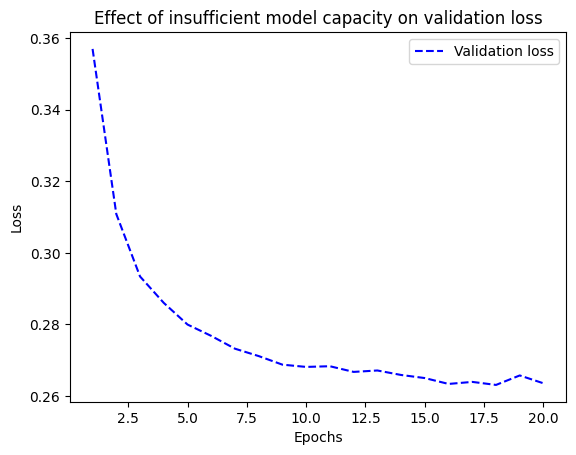

In [15]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [16]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 5ms/step - loss: 0.3635 - accuracy: 0.8971 - val_loss: 0.1931 - val_accuracy: 0.9435
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1615 - accuracy: 0.9527 - val_loss: 0.1306 - val_accuracy: 0.9627
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1155 - accuracy: 0.9656 - val_loss: 0.1146 - val_accuracy: 0.9653
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0893 - accuracy: 0.9726 - val_loss: 0.1033 - val_accuracy: 0.9705
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0717 - accuracy: 0.9776 - val_loss: 0.1036 - val_accuracy: 0.9713
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0580 - accuracy: 0.9825 - val_loss: 0.0935 - val_accuracy: 0.9722
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0488 - accuracy: 0.9854 - val_loss: 0.0906 - val_accuracy: 0.9741
Epoch 

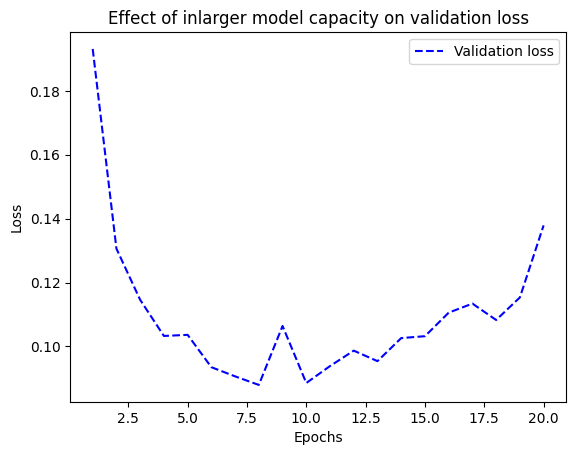

In [18]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of inlarger model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [19]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 2s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 56ms/step - loss: 0.5702 - accuracy: 0.7483 - val_loss: 0.4621 - val_accuracy: 0.8310
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3819 - accuracy: 0.8856 - val_loss: 0.3733 - val_accuracy: 0.8532
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2874 - accuracy: 0.9087 - val_loss: 0.3093 - val_accuracy: 0.8868
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2297 - accuracy: 0.9276 - val_loss: 0.2858 - val_accuracy: 0.8881
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1890 - accuracy: 0.9407 - val_loss: 0.2830 - val_accuracy: 0.8869
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1610 - accuracy: 0.9492 - val_loss: 0.2983 - val_accuracy: 0.8807
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1388 - accurac

**Version of the model with lower capacity**

In [20]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 55ms/step - loss: 0.6582 - accuracy: 0.5887 - val_loss: 0.6223 - val_accuracy: 0.6324
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5909 - accuracy: 0.7277 - val_loss: 0.5738 - val_accuracy: 0.8025
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5399 - accuracy: 0.8041 - val_loss: 0.5299 - val_accuracy: 0.8143
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4843 - accuracy: 0.8587 - val_loss: 0.4738 - val_accuracy: 0.8585
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4195 - accuracy: 0.8901 - val_loss: 0.4193 - val_accuracy: 0.8732
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3598 - accuracy: 0.9060 - val_loss: 0.3736 - val_accuracy: 0.8772
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3099 - accuracy: 0.9151 - val_loss: 0.3406 - val_accuracy: 0.8789
Epoch 8/20
30

**Version of the model with higher capacity**

In [21]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 68ms/step - loss: 0.5420 - accuracy: 0.7469 - val_loss: 0.9972 - val_accuracy: 0.5832
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3538 - accuracy: 0.8560 - val_loss: 0.2944 - val_accuracy: 0.8821
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2336 - accuracy: 0.9090 - val_loss: 0.3981 - val_accuracy: 0.8228
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1835 - accuracy: 0.9291 - val_loss: 0.3576 - val_accuracy: 0.8499
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1381 - accuracy: 0.9498 - val_loss: 0.3004 - val_accuracy: 0.8821
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1246 - accuracy: 0.9505 - val_loss: 0.2964 - val_accuracy: 0.8870
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0793 - accuracy: 0.9727 - val_loss: 0.3374 - val_accuracy: 0.8817
Epoch 8/20
30

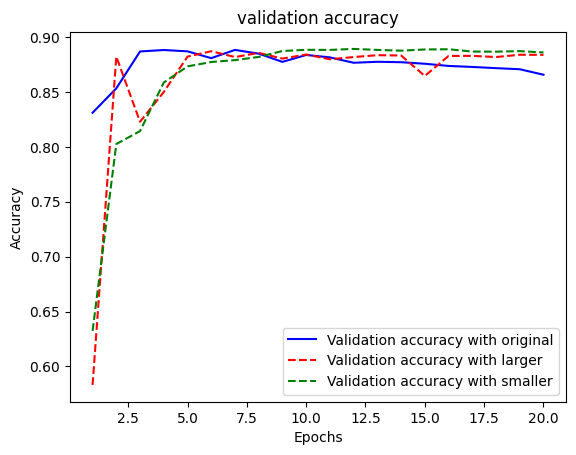

In [24]:
import matplotlib.pyplot as plt
val_acc_original = history_original.history["val_accuracy"]
val_acc_larger = history_larger_model.history["val_accuracy"]
val_acc_smaller = history_smaller_model.history["val_accuracy"]
epochs = range(1, 21)
plt.plot(epochs, val_acc_original, "b-",
         label="Validation accuracy with original")
plt.plot(epochs, val_acc_larger, "r--",
         label="Validation accuracy with larger")
plt.plot(epochs, val_acc_smaller, "g--",
         label="Validation accuracy with smaller")
plt.title("validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [25]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 58ms/step - loss: 0.6595 - accuracy: 0.7642 - val_loss: 0.5354 - val_accuracy: 0.8457
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.4582 - accuracy: 0.8769 - val_loss: 0.4218 - val_accuracy: 0.8754
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3666 - accuracy: 0.8983 - val_loss: 0.3774 - val_accuracy: 0.8828
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3197 - accuracy: 0.9131 - val_loss: 0.3860 - val_accuracy: 0.8700
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2945 - accuracy: 0.9219 - val_loss: 0.3605 - val_accuracy: 0.8820
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2718 - accuracy: 0.9321 - val_loss: 0.3694 - val_accuracy: 0.8775
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2612 - accuracy: 0.9355 - val_loss: 0.3696 - val_accuracy: 0.8804
Epoch 8/20
30

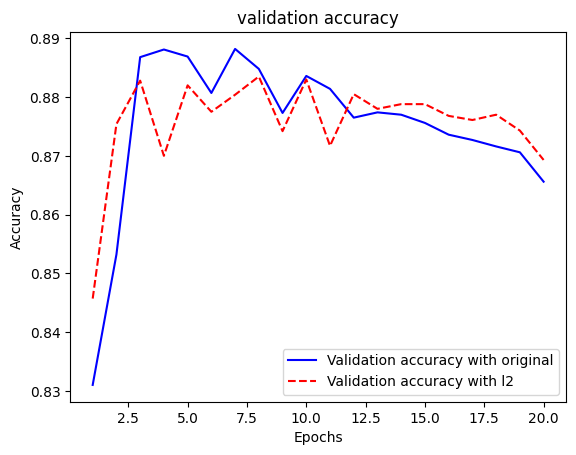

In [26]:
import matplotlib.pyplot as plt
val_acc_original = history_original.history["val_accuracy"]
val_acc_l2 = history_l2_reg.history["val_accuracy"]
epochs = range(1, 21)
plt.plot(epochs, val_acc_original, "b-",
         label="Validation accuracy with original")
plt.plot(epochs, val_acc_l2, "r--",
         label="Validation accuracy with l2")
plt.title("validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

**Different weight regularizers available in Keras**

In [27]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [28]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 55ms/step - loss: 0.6516 - accuracy: 0.6159 - val_loss: 0.5788 - val_accuracy: 0.8269
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5535 - accuracy: 0.7558 - val_loss: 0.4789 - val_accuracy: 0.8356
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4746 - accuracy: 0.8230 - val_loss: 0.4142 - val_accuracy: 0.8534
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4158 - accuracy: 0.8575 - val_loss: 0.3577 - val_accuracy: 0.8824
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3692 - accuracy: 0.8851 - val_loss: 0.3303 - val_accuracy: 0.8825
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3299 - accuracy: 0.9029 - val_loss: 0.3118 - val_accuracy: 0.8829
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2939 - accuracy: 0.9161 - val_loss: 0.3048 - val_accuracy: 0.8864
Epoch 8/20
30

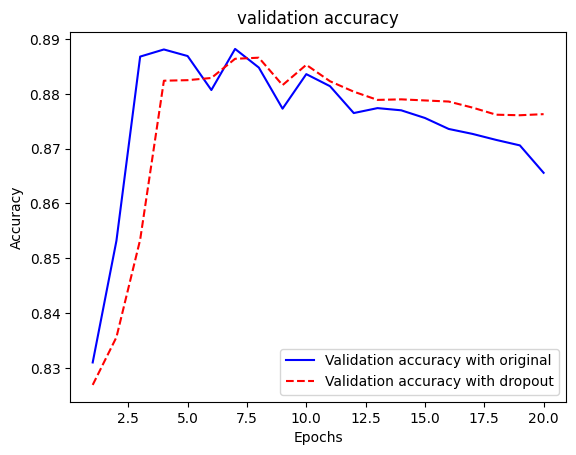

In [29]:
import matplotlib.pyplot as plt
val_acc_original = history_original.history["val_accuracy"]
val_acc_dropout = history_dropout.history["val_accuracy"]
epochs = range(1, 21)
plt.plot(epochs, val_acc_original, "b-",
         label="Validation accuracy with original")
plt.plot(epochs, val_acc_dropout, "r--",
         label="Validation accuracy with dropout")
plt.title("validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

## Summary